## Exercícios

### Exercício 1

Um cliente deseja fazer uma base de dados para catalogar super-heróis e supervilães dos quadrinhos. Temos os
seguintes requerimentos:

• Um super-herói ou supervilão tem um nome real e um nome de herói/vilão (e.g. Bruce Wayne / Batman,
Selina Kyle / Catwoman)

• Todo super-herói tem um ou mais arqui-inimigos

• Um super-herói tem ao menos um superpoder, e potencialmente vários

    o O superpoder tem um nível de intensidade, que é um valor real positivo
    
    
a) Construa o diagrama do modelo entidade-relacionamento deste problema

b) Construa o diagrama do modelo relacional para este problema

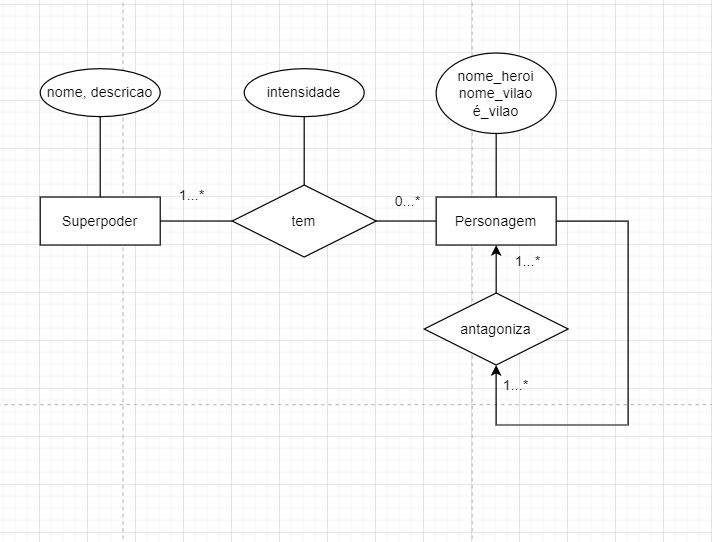



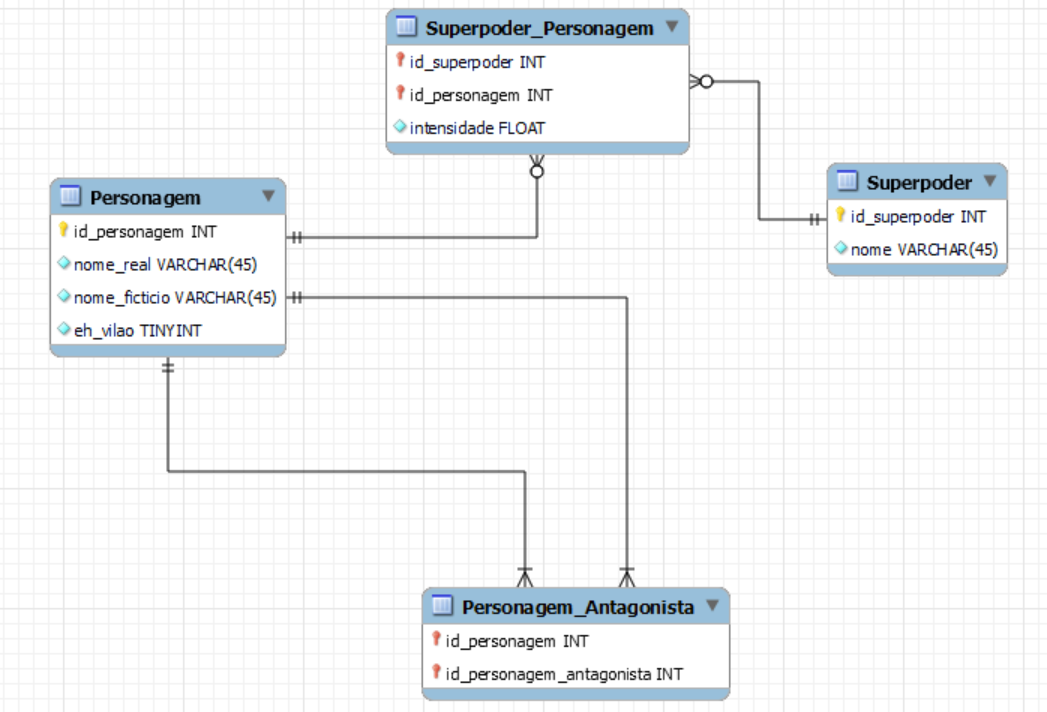

### Exercício 2


Em uma relação 𝑅(𝐴, 𝐵, 𝐶,𝐷, 𝐸) valem as seguintes dependências funcionais: 𝐵𝐶 → 𝐴, 𝐴 → 𝐶, 𝐶 → 𝐷, 𝐷 → 𝐸

a) Determine a chave primária

Chaves candidatas: AB e BC (escolha qualquer uma).

A chave primária é o BC, já que é uma chave candidata e é irredutível.


b) Determine qual a forma normal desta relação. Explique.

Ela pode ser formada por colunas com valor simples, mas o D possui uma dependência parcial de C, logo, não está na forma 2NF. E ainda que estivesse violaria o fato de que existe dependência transitiva para a PK, ou seja, também não estaria na 3NF. Logo, ela é 1NF.


c) Identifique uma possível anomalia nesta relação. Qualquer uma.


Teríamos inconsistências na informação. Isso porque o BC determina A e o A determina C, logo, se o BC mudam eles determinam A, só que se o A muda, o C vai ter que mudar para que o A continue determinando ele. Caso isso não acontência, ocorrerá discrepância na informação. 

d) Construa a normalização para a 3NF.


R(A, B, C), BC é PK 

S(A, C) , A é a PK

T(C, D) , C é a PK

U(D, E) , D é a PK

### Exercício 3

Em uma relação 𝑅(𝐴, 𝐵, 𝐶,𝐷) vale apenas a seguinte dependência funcional não-trivial: 𝐴𝐵 → 𝐶. Determine:



• A forma normal da relação

Não temos colunas com informações em lista e não simples -1NF OK.

Temos dependência parcial pois C depende apenas de AB, e a chave primária é ABD - 2NF Falso.

1NF

• A chave primária

Chaves candidatas: ABCD, ou ABD.

No caso a PK é ABD.

• Uma normalização para a 3NF.

R(A, B, D) em que ABD é a PK: 𝐴𝐵D → ABD

S(A, B, C), em que AB é a PK 𝐴𝐵 → 𝐶
...

### Exercício 4

Em uma cidade temos vários parques públicos. A prefeitura resolveu privatizar a zeladoria de todos eles: existe um
conjunto de empresas administradoras, cada uma delas responsável por alguns parques da cidade. Para monitorar o
trabalho dessas empresas, a prefeitura criou o aplicativo “Fiscais do Parque”, onde usuários podem notificar
ocorrências indesejáveis.
O modelo entidade-relacionamento que representa esse cenário é visto abaixo:


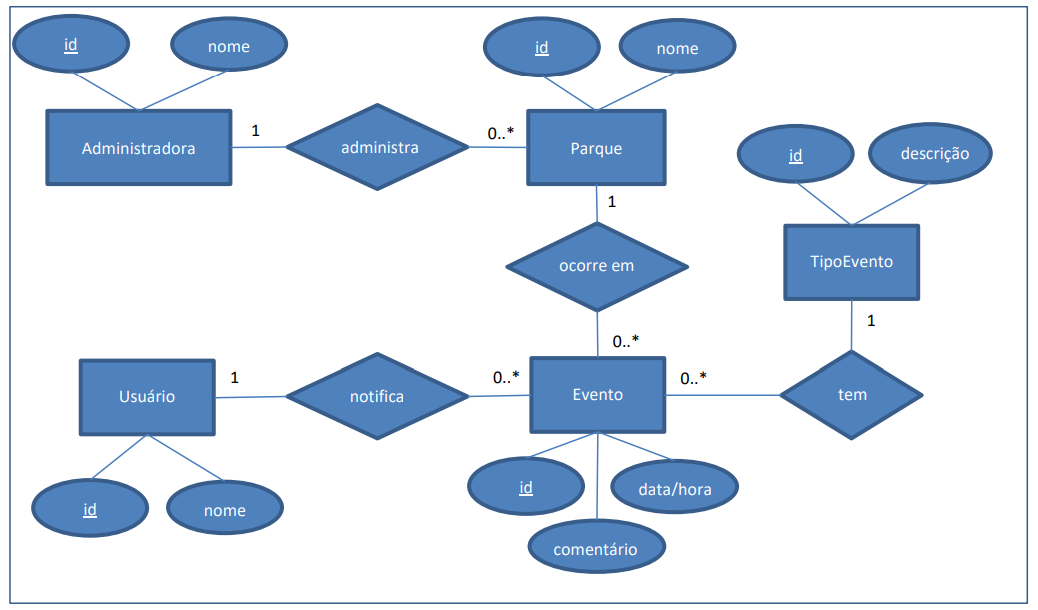


Modelo relacional correspondente:

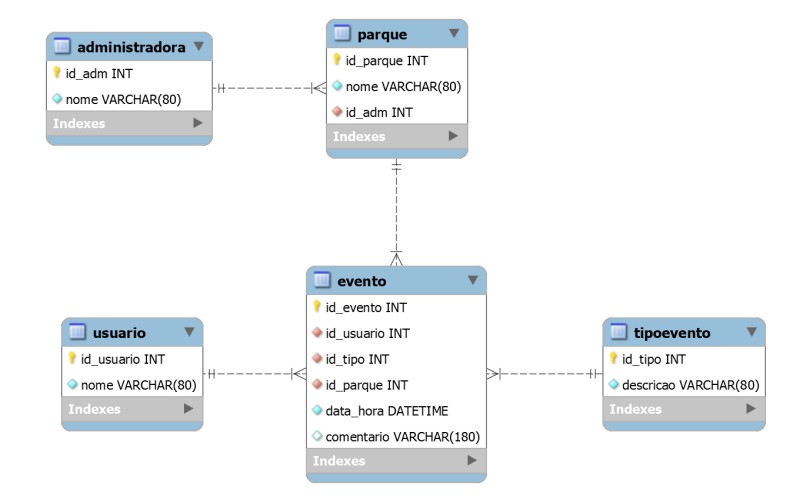

In [1]:
import mysql.connector
from functools import partial


def get_connection_helper():

    def run_db_query(connection, query, args=None):
        with connection.cursor() as cursor:
            print('Executando query:')
            cursor.execute(query, args)
            for result in cursor:
                print(result)

    connection = mysql.connector.connect(
        host='localhost',
        user='megadados',
        password='megadados',
        database='parques',
    )
    return connection, partial(run_db_query, connection)


connection, db = get_connection_helper()

In [2]:
db('''
SELECT * FROM administradora
''')

Executando query:
(1, 'Fundação Fundão')
(2, 'Instituto Instigare')
(3, 'Sociedade dos Sócios')
(4, 'Grupo Gripe')
(5, 'Associação Autônoma Andarilha')


In [3]:
db('''
SELECT * FROM parque
''')

Executando query:
(1, 'Giovana F. Pereira', 1)
(2, 'Carla G. Chateaubriand', 4)
(3, 'Jonas F. Merkel', 1)
(4, 'Carmen B. Barbosa', 1)
(5, 'Fernanda G. Silva', 3)
(6, 'Pedro A. Pereira', 1)
(7, 'José C. Mitterrand', 2)
(8, 'Ricardo B. Soares', 3)
(9, 'Franklin A. Furuya', 4)
(10, 'Ricardo D. Oliveira', 4)
(11, 'Roberta G. Mattos', 5)


In [4]:
db('''
SELECT * FROM usuario
''')

Executando query:
(1, 'Assis G. Lopes')
(2, 'José D. Gomes da Silva')
(3, 'Giovana C. Oliveira')
(4, 'Assis C. Chaves')
(5, 'Pedro E. Merkel')
(6, 'Maria C. Furuya')
(7, 'Jonas B. Lopes')
(8, 'Fernanda F. Gomes da Silva')
(9, 'Herminia D. Santos')
(10, 'Joana A. Gomes da Silva')
(11, 'Leandro B. Oliveira')
(12, 'Estela A. Santos')
(13, 'Franklin B. Barbosa')
(14, 'Carmen E. Furuya')
(15, 'Joana G. Barbosa')
(16, 'Carla E. Oliveira')
(17, 'José G. Pereira')
(18, 'Sonia C. Lopes')
(19, 'Maria D. dos Santos')
(20, 'Jonas B. Santos')
(21, 'Herminia C. Oliveira')
(22, 'Carla G. Merkel')
(23, 'Giovana B. Soares')
(24, 'Herminia F. Barbosa')
(25, 'Sonia F. Mitterrand')
(26, 'Maria F. Oliveira')
(27, 'Giovana A. Furuya')
(28, 'Jonas E. Chaves')
(29, 'Pedro G. Chateaubriand')
(30, 'Assis E. Gomes da Silva')
(31, 'Pedro F. Chateaubriand')
(32, 'Pedro D. Oliveira')
(33, 'Sonia C. Chateaubriand')
(34, 'Franklin C. dos Santos')
(35, 'Estela C. dos Santos')
(36, 'Sonia A. Pereira')
(37, 'Maria B. da

In [5]:
db('''
SELECT * FROM tipoevento
''')

Executando query:
(1, 'Segurança')
(2, 'Limpeza')
(3, 'Atendimento')
(4, 'Infraestrutura')


In [6]:
db('''
SELECT * FROM evento
''')

Executando query:
(1, 11, 2, 5, datetime.datetime(2020, 5, 6, 10, 54, 17), 'algum comentario')
(2, 12, 3, 4, datetime.datetime(2020, 9, 9, 10, 54, 10), 'algum comentario')
(3, 9, 1, 7, datetime.datetime(2021, 5, 20, 10, 45, 6), 'algum comentario')
(4, 38, 4, 2, datetime.datetime(2021, 1, 5, 15, 42, 25), 'algum comentario')
(5, 39, 1, 7, datetime.datetime(2020, 8, 10, 16, 42, 16), 'algum comentario')
(6, 32, 3, 2, datetime.datetime(2021, 10, 14, 9, 40, 27), 'algum comentario')
(7, 29, 1, 3, datetime.datetime(2021, 12, 15, 15, 45, 51), 'algum comentario')
(8, 8, 4, 8, datetime.datetime(2020, 4, 18, 14, 6, 46), 'algum comentario')
(9, 32, 4, 2, datetime.datetime(2020, 10, 6, 11, 19, 53), 'algum comentario')
(10, 42, 4, 7, datetime.datetime(2020, 9, 20, 13, 34, 32), 'algum comentario')
(11, 8, 1, 1, datetime.datetime(2021, 10, 16, 17, 52), 'algum comentario')
(12, 22, 1, 7, datetime.datetime(2020, 3, 12, 17, 3, 14), 'algum comentario')
(13, 7, 1, 1, datetime.datetime(2021, 5, 4, 13, 22, 18

(1036, 33, 1, 9, datetime.datetime(2020, 7, 3, 15, 33, 56), 'algum comentario')
(1037, 30, 3, 8, datetime.datetime(2021, 5, 5, 14, 10, 50), 'algum comentario')
(1038, 23, 3, 4, datetime.datetime(2021, 5, 12, 11, 22, 20), 'algum comentario')
(1039, 23, 1, 3, datetime.datetime(2020, 1, 13, 14, 23, 9), 'algum comentario')
(1040, 19, 1, 10, datetime.datetime(2020, 4, 4, 16, 24, 15), 'algum comentario')
(1041, 33, 2, 7, datetime.datetime(2020, 9, 15, 17, 43, 40), 'algum comentario')
(1042, 35, 3, 6, datetime.datetime(2021, 5, 10, 8, 2, 25), 'algum comentario')
(1043, 8, 2, 3, datetime.datetime(2021, 1, 3, 16, 15, 26), 'algum comentario')
(1044, 8, 1, 6, datetime.datetime(2020, 3, 5, 14, 50, 38), 'algum comentario')
(1045, 17, 1, 6, datetime.datetime(2021, 8, 8, 9, 25, 9), 'algum comentario')
(1046, 21, 3, 9, datetime.datetime(2020, 6, 3, 8, 31, 2), 'algum comentario')
(1047, 29, 3, 4, datetime.datetime(2021, 6, 3, 11, 5, 45), 'algum comentario')
(1048, 4, 2, 9, datetime.datetime(2020, 11, 1

O script pf.sql contém código para criar esse banco de dados no MySQL e também adiciona dados de exemplo,
usem a vontade para testar as respostas das questões da prova!

a) Escreva uma query que liste todas as administradoras, ordenadas por número de eventos de segurança
ocorridos nos parques que administram. Pegadinha: e se não houve evento de segurança em seus parques?


In [44]:
db('''
SELECT
    DISTINCT(id_adm), administradora.nome, COUNT(id_evento) as eventos_seg, id_tipo
FROM
    administradora
    LEFT OUTER JOIN parque USING(id_adm)
    LEFT OUTER JOIN evento USING(id_parque)
WHERE 
    id_tipo = 1
GROUP BY
    id_adm
ORDER BY
    eventos_seg DESC


''')

Executando query:
(1, 'Fundação Fundão', 207, 1)
(4, 'Grupo Gripe', 130, 1)
(3, 'Sociedade dos Sócios', 105, 1)
(2, 'Instituto Instigare', 54, 1)


In [9]:
# RESPOSTA PROF

db('''
SELECT
    DISTINCT(id_adm), administradora.nome, COUNT(id_evento) as eventos_seg, descricao
FROM
    administradora
    LEFT OUTER JOIN parque USING(id_adm)
    LEFT OUTER JOIN evento USING(id_parque)
    INNER JOIN TipoEvento USING(id_tipo)
WHERE 
    descricao = "Seguranca"
GROUP BY
    id_adm
ORDER BY
    eventos_seg DESC
''')

Executando query:
(1, 'Fundação Fundão', 207, 'Segurança')
(4, 'Grupo Gripe', 130, 'Segurança')
(3, 'Sociedade dos Sócios', 105, 'Segurança')
(2, 'Instituto Instigare', 54, 'Segurança')


In [10]:
db('''
SELECT
    DISTINCT(id_adm), COUNT(id_evento) as eventos_seg
FROM
    parque
    LEFT OUTER JOIN evento USING(id_parque)
WHERE 
    id_tipo = 1
GROUP BY
    id_adm
ORDER BY
    eventos_seg DESC
''')

Executando query:
(1, 207)
(4, 130)
(3, 105)
(2, 54)


b) Crie uma tabela temporária Total que tem as colunas (id_usuario, total) onde a coluna total indica o
número total de eventos notificados pelo usuário id_usuario.

In [11]:
db('DROP TEMPORARY TABLE IF EXISTS Total')

db('''
CREATE TEMPORARY TABLE Total
    SELECT
        id_usuario, COUNT(id_evento) as total
    FROM
        usuario
        INNER JOIN evento USING(id_usuario)
    GROUP BY
        id_usuario
    ORDER BY
        total DESC
''')

db('SELECT * FROM Total')

Executando query:
Executando query:
Executando query:
(22, 50)
(19, 49)
(42, 49)
(8, 48)
(44, 47)
(37, 47)
(9, 47)
(15, 46)
(23, 46)
(1, 45)
(6, 44)
(13, 44)
(35, 44)
(50, 44)
(2, 43)
(32, 43)
(10, 42)
(11, 42)
(38, 42)
(4, 41)
(5, 41)
(30, 41)
(27, 41)
(16, 40)
(39, 39)
(40, 39)
(41, 39)
(46, 39)
(48, 39)
(49, 39)
(36, 38)
(45, 38)
(3, 37)
(14, 37)
(21, 37)
(43, 37)
(20, 37)
(33, 37)
(31, 36)
(47, 36)
(7, 35)
(18, 35)
(28, 35)
(29, 35)
(34, 35)
(12, 33)
(17, 31)
(26, 31)
(25, 30)
(24, 30)


c) Crie uma tabela temporária chamada UsuarioParque que tem as colunas (id_usuario, id_parque,
contagem) onde contagem é o número de eventos que o usuário id_usuario notificou acerca do parque
id_parque. Dica: GROUP BY permite agrupar por múltiplas colunas.


In [12]:
db('DROP TEMPORARY TABLE IF EXISTS UsuarioParque')

db('''
CREATE TEMPORARY TABLE UsuarioParque
    SELECT
        id_usuario, id_parque, COUNT(id_evento) as contagem
    FROM
        usuario
        INNER JOIN evento USING(id_usuario)
    GROUP BY
        id_usuario, id_parque
    ORDER BY
        contagem DESC
''')

db('SELECT * FROM UsuarioParque')

Executando query:
Executando query:
Executando query:
(48, 2, 13)
(13, 10, 11)
(14, 6, 11)
(1, 10, 10)
(9, 2, 10)
(19, 4, 10)
(21, 9, 10)
(15, 9, 9)
(35, 4, 9)
(37, 2, 9)
(42, 5, 9)
(1, 5, 8)
(2, 5, 8)
(22, 10, 8)
(22, 6, 8)
(23, 7, 8)
(23, 3, 8)
(26, 5, 8)
(32, 2, 8)
(35, 6, 8)
(36, 10, 8)
(36, 1, 8)
(37, 4, 8)
(44, 2, 8)
(2, 7, 7)
(2, 8, 7)
(2, 3, 7)
(5, 8, 7)
(5, 3, 7)
(6, 10, 7)
(8, 8, 7)
(8, 9, 7)
(10, 2, 7)
(10, 3, 7)
(11, 5, 7)
(11, 7, 7)
(12, 2, 7)
(15, 6, 7)
(16, 3, 7)
(16, 2, 7)
(17, 3, 7)
(18, 8, 7)
(26, 1, 7)
(27, 8, 7)
(28, 8, 7)
(30, 6, 7)
(30, 4, 7)
(31, 6, 7)
(32, 9, 7)
(35, 5, 7)
(37, 5, 7)
(37, 8, 7)
(37, 3, 7)
(38, 9, 7)
(39, 4, 7)
(43, 2, 7)
(44, 6, 7)
(46, 8, 7)
(46, 10, 7)
(47, 9, 7)
(49, 7, 7)
(1, 1, 6)
(4, 1, 6)
(6, 8, 6)
(6, 1, 6)
(7, 6, 6)
(8, 7, 6)
(8, 2, 6)
(11, 1, 6)
(11, 8, 6)
(13, 1, 6)
(13, 7, 6)
(15, 4, 6)
(18, 5, 6)
(19, 3, 6)
(19, 9, 6)
(19, 10, 6)
(22, 2, 6)
(22, 3, 6)
(24, 9, 6)
(25, 5, 6)
(26, 7, 6)
(27, 10, 6)
(28, 1, 6)
(29, 3, 6)
(30, 10, 6)
(32

d) Um usuário é um fã de um parque se a fração de eventos que ele notifica para o parque, em relação ao número
total de eventos que ele notificou para todos os parques, é superior a 20%. Usando as tabelas temporárias acima
(mesmo que não as tenha desenvolvido) faça uma query que lista os usuários que são fãs de dois ou mais
parques.


In [13]:
db('''
SELECT
    id_usuario, id_parque, (contagem/total)*100
FROM
    total
    INNER JOIN UsuarioParque USING (id_usuario)
WHERE
    (contagem/total)*100 > 20

''')

Executando query:
(48, 2, Decimal('33.3333'))
(13, 10, Decimal('25.0000'))
(14, 6, Decimal('29.7297'))
(1, 10, Decimal('22.2222'))
(9, 2, Decimal('21.2766'))
(19, 4, Decimal('20.4082'))
(21, 9, Decimal('27.0270'))
(35, 4, Decimal('20.4545'))
(26, 5, Decimal('25.8065'))
(36, 10, Decimal('21.0526'))
(36, 1, Decimal('21.0526'))
(12, 2, Decimal('21.2121'))
(17, 3, Decimal('22.5806'))
(26, 1, Decimal('22.5806'))


In [14]:
db('''
SELECT
    id_usuario, COUNT(id_parque) as fa_de_parques, (contagem/total)*100
FROM
    total
    INNER JOIN UsuarioParque USING (id_usuario)
WHERE
    (contagem/total)*100 > 20
GROUP BY
    id_usuario
HAVING
    fa_de_parques >= 2
    
''')

Executando query:
(26, 2, Decimal('25.8065'))
(36, 2, Decimal('21.0526'))


In [15]:
connection.close()

e) Suponha que desejamos modificar os requerimentos do problema da seguinte forma:

• A cidade será dividida em regiões. Cada região tem um nome, um id, e um subprefeito. Podemos ter regiões
sem parques.

• Todos os parques de uma região são administrados pela mesma empresa administradora

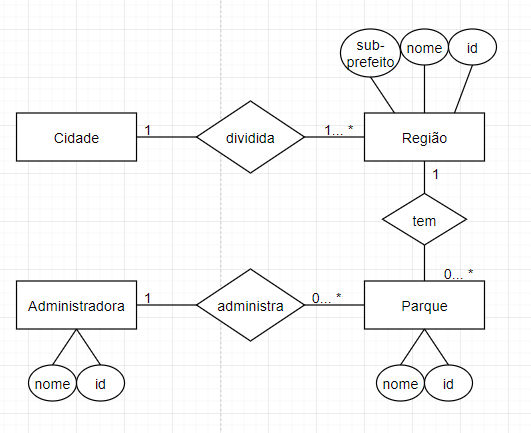

f) Modifique o diagrama do modelo relacional para incorporar a mudança do item anterior. Não precisa
redesenhar o diagrama completo, apenas as partes relacionadas com a mudança.

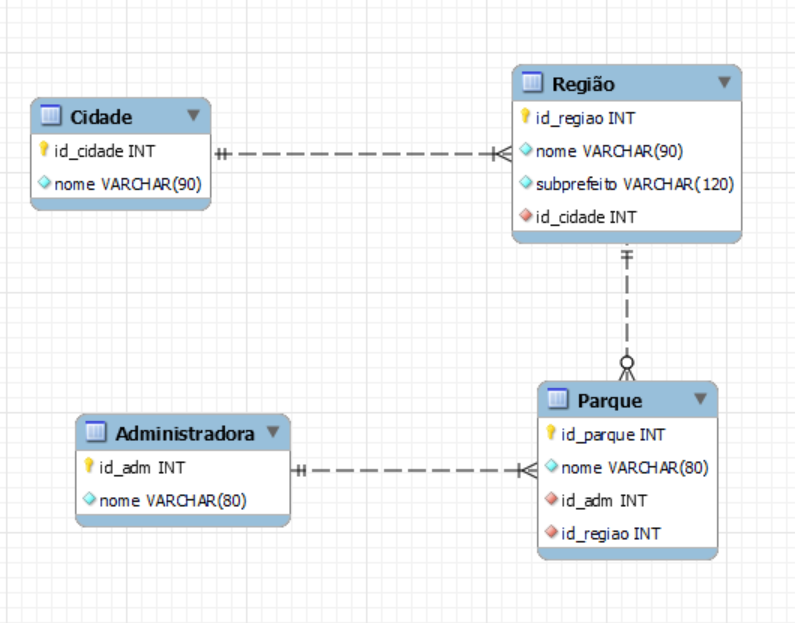

## Exercício 5

“Lo marqué un poco con la cabeza y un poco con la mano de Dios” – Maradona
Na Copa do Mundo de 1986 (vosso professor tinha 11 anos – eu vi!) a Argentina disputava com a Inglaterra uma
partida das quartas-de-final. No início do segundo tempo Maradona sobe para cabecear e golpeia a bola com a mão,
vencendo o goleiro e marcando um gol que deveria ser anulado, mas que foi validado pelo árbitro. Esse gol ficou
conhecido como “A Mão de Deus”. Quatro minutos depois Maradona dribla quatro defensores ingleses e o goleiro,
marcando o gol que ficou conhecido como “O Gol do Século”, considerado um dos mais bonitos de todas as Copas.

Curioso a respeito desses gols históricos, você decidiu fazer um banco de dados de gols em Copas do Mundo. Eis os
requisitos:

• Cada partida envolve dois times, claro.

• O gol é marcado por um jogador, claro.

• O jogador pertence a um time, claro.

• A partida tem um local e data, claro.

• O gol pode ter um apelido.

• O gol é marcado com uma parte do corpo: cabeça, perna direita, perna esquerda, mão direita, mão esquerda
(Maradona provou que dá), etc.

• O gol é marcado em um certo minuto da partida, claro.

a) Construa o diagrama entidade-relacionamento para este problema.



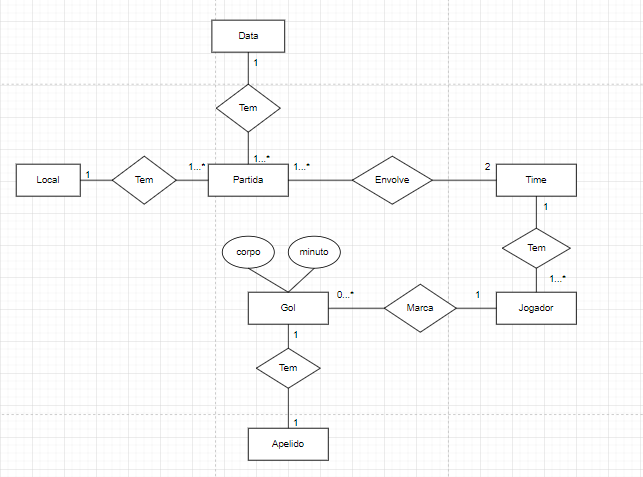

Apelido ali é 0...1

b) Construa o diagrama do modelo relacional para este problema.

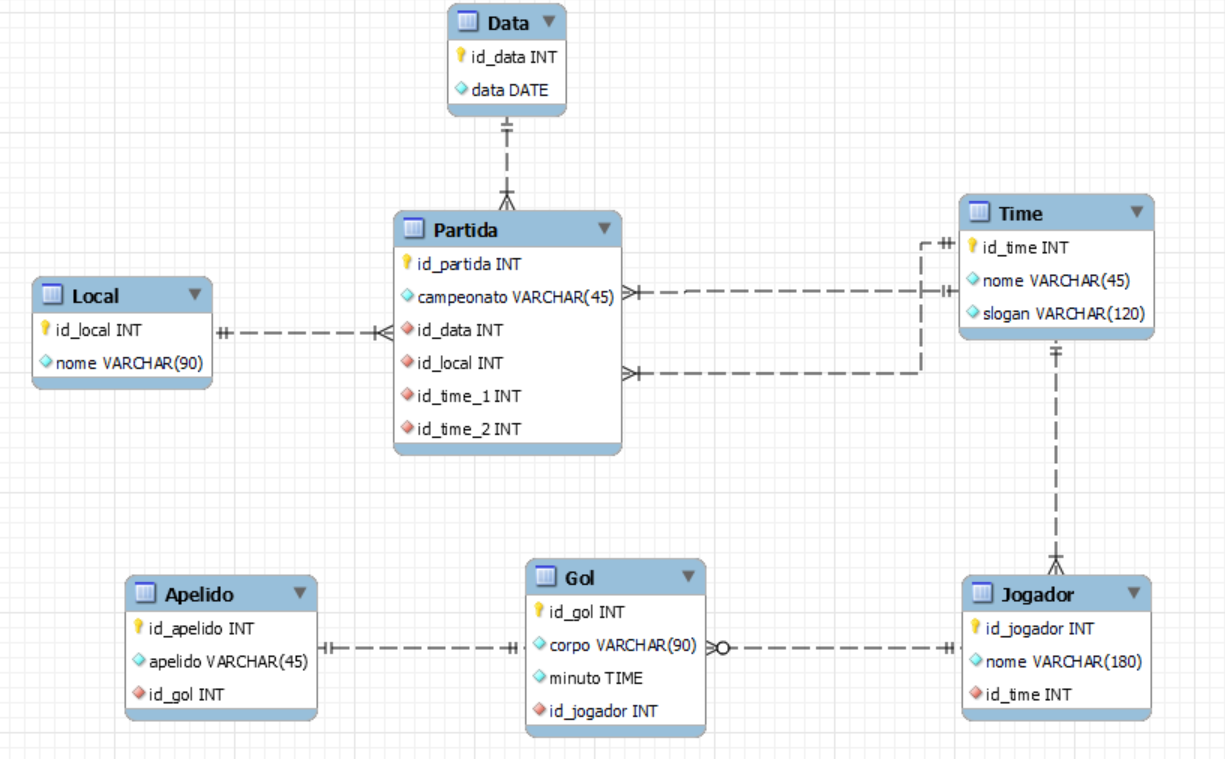